# Brianna Zhou

## Research question/interests

Briefly describe your research question or interests here.

### Research Interests
**How do different tree species in Vancouver’s public spaces vary in terms of growth patterns and physical traits, and what does this suggest about their sustainability for Vancouver’s urban environment?**

### Research Questions

- *How do height and diameter vary across different tree species in Vancouver’s public spaces?* Examines the fundamental growth of characteristics of trees, which are essential for understanding their long-term sustainability in urban areas

- *How does the spatial distribution of the physical traits of species differ across Vancouver?* Determines whether certain species are concentrated in specific areas due to environmental factors, urban planning decisions, or ecological suitability. 

- *How do height and diameter of tree influence their placement in different urban settings (e.g., streets, parks, medians, and greenways)?* Trees of different sizes and growth patterns may be more appropriate for certain settings. Understanding these relationships supports better planning for sustainability.


In [1]:
import altair as alt
import pandas as pd
from toolz.curried import pipe
import os
from pygbif import species

import sys
sys.path.append("../../code")
import data_clean
import preprocess_query_family
import preprocess_query_pollen
import preprocess_change_col_type
import altair_data_transformer
from IPython.display import Image

# Create a new data transformer that stores the files in a directory
data_dir = 'altairdata'
altair_data_transformer.setup_altair_for_large_data(data_dir)

In [2]:
tree = pd.read_csv("../../data/processed/public_trees_cleaned.csv", delimiter=",")
tree.head()

,TREE_ID,CIVIC_NUMBER,STD_STREET,GENUS_NAME,SPECIES_NAME,CULTIVAR_NAME,COMMON_NAME,ON_STREET_BLOCK,ON_STREET,NEIGHBOURHOOD_NAME,...,DIAMETER,DATE_PLANTED,Geom,geo_point_2d,LATITUDE,LONGITUDE,NOMENCLATURE,ON_ADDRESS,FAMILY_NAME,HAS_POLLEN
0,229002,2128,E 54TH AV,FAGUS,SYLVATICA,DAWYCKII,DAWYCK'S BEECH,2100,E 54TH AV,VICTORIA-FRASERVIEW,...,3.0,2014-03-12,"{""coordinates"": [-123.06377300024464, 49.22020...","49.22020099919947, -123.06377300024464",49.220201,-123.063773,FAGUS SYLVATICA,2100 E 54TH AV VICTORIA-FRASERVIEW (EVEN),FAGACEAE,True
1,229005,8443,FREMLIN ST,ACER,TRUNCATUM,PACIFIC SUNSET,PACIFIC SUNSET MAPLE,8400,FREMLIN ST,MARPOLE,...,12.0,2010-11-08,"{""coordinates"": [-123.12751900039063, 49.20967...","49.20967799914094, -123.12751900039063",49.209678,-123.127519,ACER TRUNCATUM,8400 FREMLIN ST MARPOLE (ODD),ACERACEAE,False
2,229013,1407,W 59TH AV,PRUNUS,CERASIFERA,NIGRA,NIGHT PURPLE LEAF PLUM,7400,CARTIER ST,MARPOLE,...,3.0,2010-10-20,"{""coordinates"": [-123.13790199955884, 49.21762...","49.21762499869929, -123.13790199955884",49.217625,-123.137902,PRUNUS CERASIFERA,7400 CARTIER ST MARPOLE (ODD),ROSACEAE,True
3,229015,489,W 2ND AV,PYRUS,CALLERYANA,CHANTICLEER,CHANTICLEER PEAR,400,W 2ND AV,MOUNT PLEASANT,...,3.0,2009-12-10,"{""coordinates"": [-123.11410500027938, 49.26698...","49.26698999931175, -123.11410500027938",49.266990,-123.114105,PYRUS CALLERYANA,400 W 2ND AV MOUNT PLEASANT (MED),ROSACEAE,False
4,229016,489,W 2ND AV,PYRUS,CALLERYANA,CHANTICLEER,CHANTICLEER PEAR,400,W 2ND AV,MOUNT PLEASANT,...,3.0,2009-12-10,"{""coordinates"": [-123.11399200056373, 49.26704...","49.267045998933334, -123.11399200056373",49.267046,-123.113992,PYRUS CALLERYANA,400 W 2ND AV MOUNT PLEASANT (MED),ROSACEAE,False


In [3]:
display(tree.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181501 entries, 0 to 181500
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TREE_ID             181501 non-null  int64  
 1   CIVIC_NUMBER        181501 non-null  int64  
 2   STD_STREET          181501 non-null  object 
 3   GENUS_NAME          181501 non-null  object 
 4   SPECIES_NAME        181501 non-null  object 
 5   CULTIVAR_NAME       181501 non-null  object 
 6   COMMON_NAME         181501 non-null  object 
 7   ON_STREET_BLOCK     181501 non-null  int64  
 8   ON_STREET           181501 non-null  object 
 9   NEIGHBOURHOOD_NAME  177573 non-null  object 
 10  STREET_SIDE_NAME    181501 non-null  object 
 11  HEIGHT_RANGE_ID     181501 non-null  int64  
 12  HEIGHT_RANGE        181501 non-null  object 
 13  DIAMETER            181501 non-null  float64
 14  DATE_PLANTED        74159 non-null   object 
 15  Geom                181501 non-nul

None

In [4]:
display(tree.describe())

,TREE_ID,CIVIC_NUMBER,ON_STREET_BLOCK,HEIGHT_RANGE_ID,DIAMETER,LATITUDE,LONGITUDE
count,181501.000000,181501.00000,181501.000000,181501.000000,181501.000000,181501.000000,181501.000000
mean,176086.154627,3094.49278,3068.451127,2.997388,12.734885,49.248839,-123.107687
std,103380.908520,2125.67509,2132.819280,1.939766,10.201543,0.022868,0.048919
min,12.000000,0.00000,0.000000,1.000000,0.000000,49.200203,-123.236684
25%,86445.000000,1396.00000,1400.000000,1.000000,4.000000,49.230403,-123.144378
50%,175660.000000,2732.00000,2700.000000,2.000000,10.000000,49.248475,-123.109569
75%,264569.000000,4489.00000,4500.000000,4.000000,18.000000,49.266611,-123.064573
max,344765.000000,9295.00000,9900.000000,9.000000,305.000000,49.312730,-123.023294


In [5]:
display(tree.nunique())

TREE_ID               181501
CIVIC_NUMBER            8339
STD_STREET               814
GENUS_NAME               169
SPECIES_NAME             539
CULTIVAR_NAME           1070
COMMON_NAME             1297
ON_STREET_BLOCK          189
ON_STREET                822
NEIGHBOURHOOD_NAME        22
STREET_SIDE_NAME           6
HEIGHT_RANGE_ID            9
HEIGHT_RANGE               9
DIAMETER                 490
DATE_PLANTED            4570
Geom                  181372
geo_point_2d          181372
LATITUDE              181368
LONGITUDE             181365
NOMENCLATURE             701
ON_ADDRESS             19269
FAMILY_NAME               65
HAS_POLLEN                 2
dtype: int64

## Task Analysis

1. Determine Range: Identify the range of tree diameters.
2. Characterize Distribution:
   - Analyze the distribution of diameters and heights among different tree species as well as along different street sides.
4. Sort: Rank tree species based on the count of trees, their average diameters and the most common height ranges.
5. Filter: Select the top 20 tree species that have diameters greater than 60 inches to illustrate their distribution.
6. Calculate the average diameter for each height range of the tree species.
7. Compute Derived Value:
   - Compute the total number of trees/ average number of trees in each street side
   - Compute the total number of trees in each family species

## Explanatory Data Analysis

### Distribution of Diameter and Height Range and Tree Species

Distribution of Diameter
   - Most trees exhibit small diameters, with a significant drop-off as diameters increase.
   - The logarithmic scale on the y-axis accentuates the high number of trees with diameters under 40 inches.
   - Only a handful of trees possess exceptionally large diameters (over 100 inches), which are quite rare.
   - The color gradient visually represents the higher density of trees in the lower diameter categories.

Distribution of Height
   - The majority of trees are within the 10-30 feet height range, indicating a prevalence of shorter trees.
   - There is a notable decrease in the number of taller trees (over 50 feet).
   - A null category indicates that some trees are missing height data.
   - Variation in height categories may reflect how different tree species adapt to urban environments.

Distribution of Family Species
   - The Rosaceae (rose family) dominates in Vancouver.
   - The Aceraceae (maple family) and Fagaceae (oak family) are also prevalent, showing a preference for these species in the area.
   - There is a sharp decline in frequency as one moves toward less common families.
   - Many lesser-known families have less than 100 trees recorded, indicating lower diversity among certain species.

Average Diameter by Height Range
   - There is a positive correlation between tree height and diameter; taller trees tend to have larger diameters, consistent with biological growth patterns.

In summary, the data suggest that most trees in Vancouver’s public spaces are predominantly small to medium-sized in both height and diameter. The limited number of larger trees may indicate constraints related to space or maintenance. Moreover, the prevalence of a few tree families (Rosaceae, Aceraceae, and Fagaceae) implies a deliberate selection of species based on specific factors.

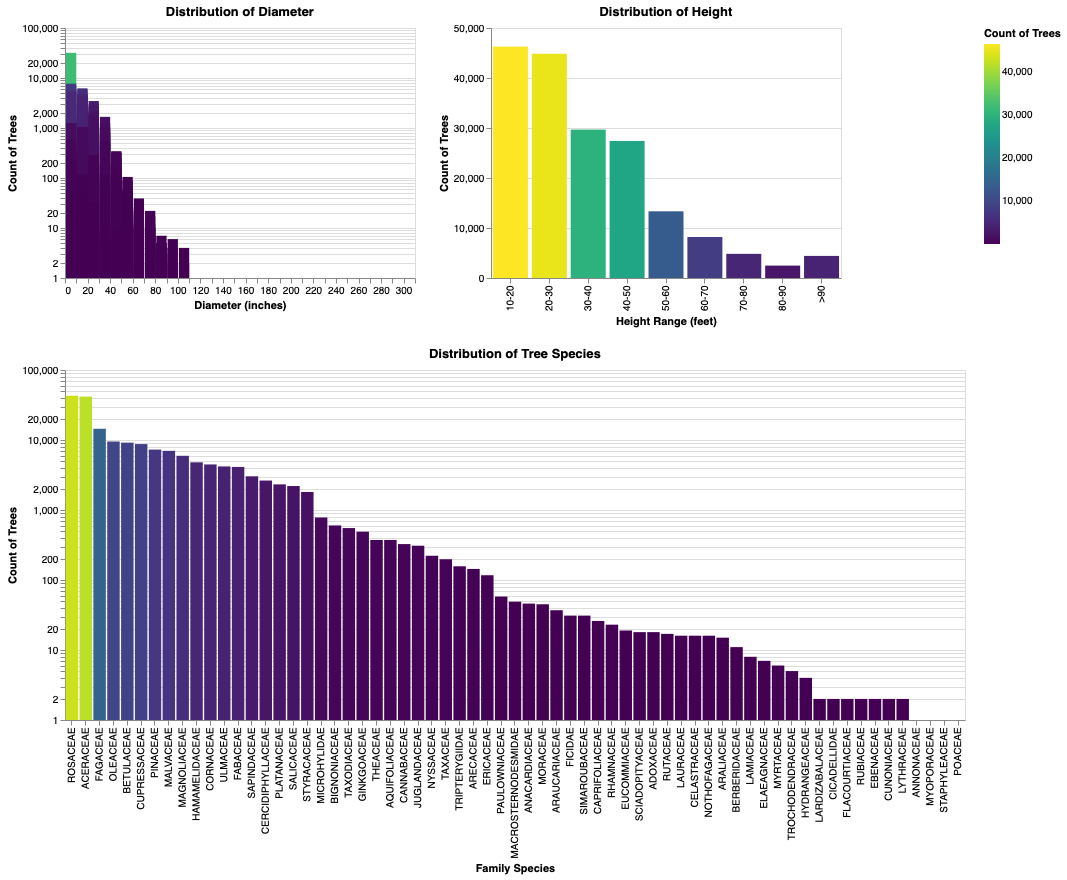

In [6]:
dia_dist = alt.Chart(tree).mark_bar().encode(
    alt.X("DIAMETER:Q", title = "Diameter (inches)", bin=alt.Bin(maxbins=50)),
    alt.Y("count():Q", scale=alt.Scale(type='log'), title = "Count of Trees"),
    alt.Color("count()", scale=alt.Scale(scheme='viridis'), title = "Count of Trees"),
    alt.Tooltip(["DIAMETER", "count()"])
).properties(
        title = "Distribution of Diameter",
        height = 250,
        width = 350
    )

height_dist = alt.Chart(tree).mark_bar().encode(
    alt.X("HEIGHT_RANGE", title = "Height Range (feet)"),
    alt.Y("count():Q", title = "Count of Trees"),
    alt.Color("count()", title = "Count of Trees"),
    alt.Tooltip(["HEIGHT_RANGE", "count()"])
).properties(
        title = "Distribution of Height",
        height = 250,
        width = 350
    )

tree_dist = alt.Chart(tree).mark_bar().encode(
    alt.X("FAMILY_NAME:N", title = "Family Species", sort = "-y"),
    alt.Y("count():Q", scale=alt.Scale(type='log'), title = "Count of Trees"),
    alt.Color("count()", title = "Count of Trees"),
    alt.Tooltip(["FAMILY_NAME:N", "count()"])
).properties(
        title = "Distribution of Tree Species",
        height = 350,
        width = 900
    )
tree_dist

combined_distri_fig = (dia_dist | height_dist) & tree_dist
combined_distri_fig

In [8]:
combined_distri_fig.save("../../images/Bri_eda1/combined_distribution_figure.png")

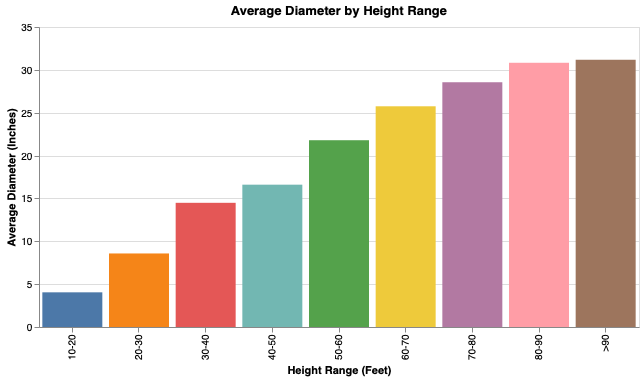

In [9]:
bar_chart = alt.Chart(tree).mark_bar().encode(
    alt.X("HEIGHT_RANGE:O", title="Height Range (Feet)", sort="ascending"),
    alt.Y("mean(DIAMETER):Q", title="Average Diameter (Inches)"),
    alt.Color("HEIGHT_RANGE:N", legend=None)
).properties(
    title="Average Diameter by Height Range",
    width=600
)

bar_chart

In [10]:
bar_chart.save("../../images/Bri_eda1/avg_dia_height.png")

### Distribution of Average Diameter and Count of Height Range in the Top 20 Common Family Species

1. Average Diameter Distribution Across the Top 20 Tree Species
- This section showcases the average trunk diameter for the top 20 tree species, arranged in ascending order.
- Some families, such as Bignominaceae, Salicaceae, and Cupressaceae, show significantly larger average diameters, possibly indicating they are slow-growing or inherently larger species.
- In contrast, species like Styracaceae and Cornaceae exhibit smaller average diameters, which may suggest they are younger, faster-growing, or typically smaller in size.


2. Height Distribution and Frequency of the Top 20 Tree Species
- This part presents a stacked bar chart that details the height distribution among the same top 20 tree species.
- Different color segments indicate various height ranges, illustrating the proportion of trees within each category.
- Certain species, including Cupressaceae, Microhylidae, and Salicaceae, have a greater proportion of tall trees (over 50m). Meanwhile, others like Cornaceae, Styracaceae, and Hamamelidaceae show a notable concentration of shorter trees (ranging from 10-30m).

The visualizations indicate that some species, like Cupressaceae and Salicaceae, tend to display both larger diameters and heights, suggesting a positive correlation between height and diameter. Conversely, species such as Cornaceae exhibit both smaller dimensions in diameter and height. Additionally, some species (e.g., Fabaceae and Cornaceae) display a wide range of heights, indicating their adaptability to various urban conditions.

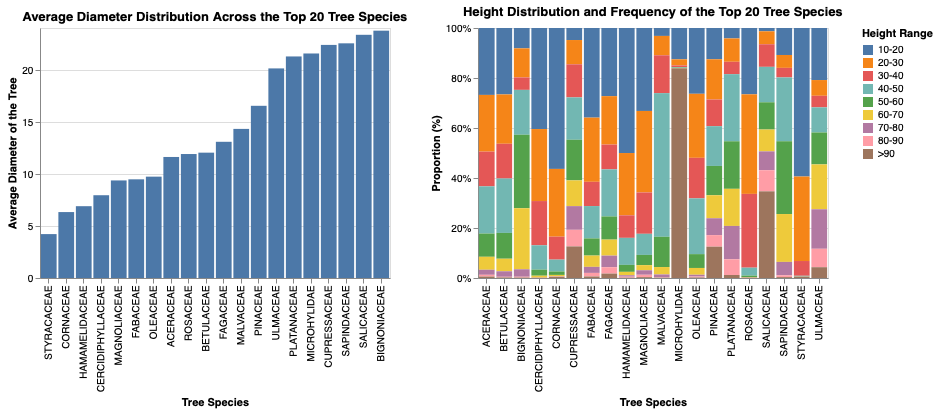

In [13]:
top_20_species = tree['FAMILY_NAME'].value_counts().head(20).index.tolist()

# Filter data for top 20 family species
top_20_tree_species  = tree[tree['FAMILY_NAME'].isin(top_20_species)]

avgdia_tree_dist = alt.Chart(top_20_tree_species).mark_bar().encode(
    alt.X("FAMILY_NAME:N", title = "Tree Species", sort = "y"),
    alt.Y("average(DIAMETER):Q", title = "Average Diameter of the Tree"),
    alt.Tooltip(["count()", "average(DIAMETER)"])
).properties(
        title = "Average Diameter Distribution Across the Top 20 Tree Species",
        height = 250,
        width = 350
    )

#Count the number of trees in each height range for the top 20 tree species
height_counts = top_20_tree_species.groupby(['FAMILY_NAME', 'HEIGHT_RANGE']).size().reset_index(name='count')

height_tree_dist = alt.Chart(height_counts).mark_bar().encode(
    alt.X("FAMILY_NAME:N", title = "Tree Species"),
    alt.Y("count:Q", stack = "normalize", axis=alt.Axis(title="Proportion (%)", format=".0%")),
    alt.Color("HEIGHT_RANGE", title = "Height Range"),
    alt.Tooltip(["HEIGHT_RANGE", "count()"])
).properties(
        title = "Height Distribution and Frequency of the Top 20 Tree Species",
        height = 250,
        width = 350
    )

tree_distri = avgdia_tree_dist | height_tree_dist
tree_distri

In [14]:
tree_distri.save("../../images/Bri_eda1/tree_distri.png")

### Distribution of Species, Diameter and Height across Vancouver

The graph illustrates the geographic distribution of Vancouver’s three most common tree families: Aceraceae, Fagaceae, and Rosaceae, revealing important spatial patterns and physical characteristics.

The three tree families are relatively evenly distributed throughout Vancouver, although there are denser clusters in specific regions. Both Aceraceae (Maple Family) and Rosaceae (Rose Family) tend to have larger diameter sizes and appear to be more uniformly spread across the city. In contrast, Fagaceae (Oak/Beech Family), which generally has smaller diameter sizes, shows some localized clustering.

Additionally, the distribution of tree heights indicates that larger trees are not confined to particular areas. The majority fall within the 10-30m height range, with significantly fewer trees reaching heights beyond 30m. This suggests a general pattern in tree growth and distribution across the urban landscape.

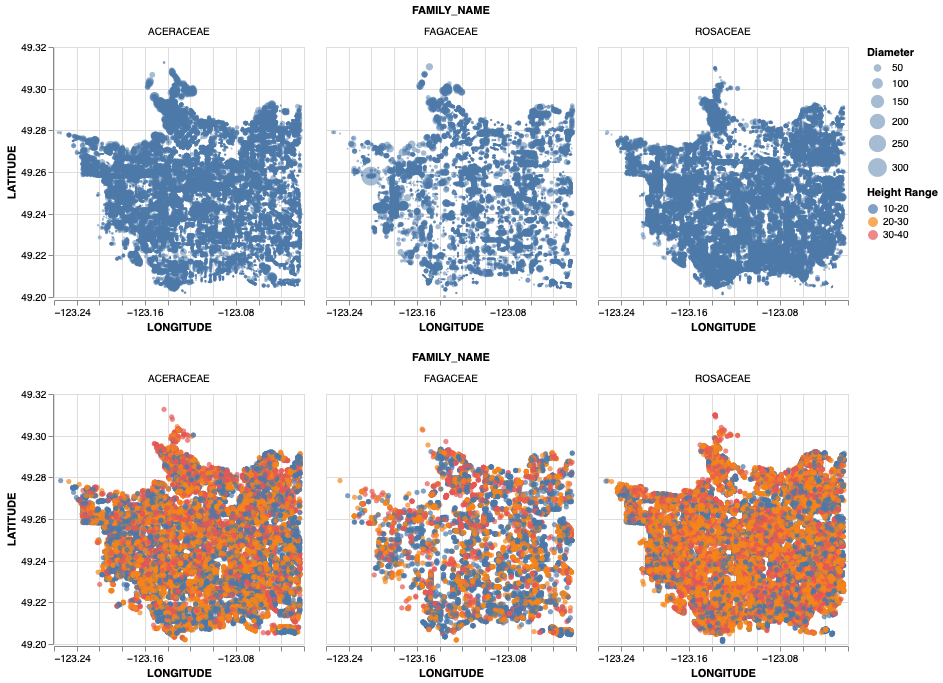

In [15]:
# Select TOP 3 species by count
top_species = tree['FAMILY_NAME'].value_counts().head(3).index.tolist()

# Filter data for top 3 family species
top_tree_species  = tree[tree['FAMILY_NAME'].isin(top_species)]

species_map = alt.Chart(top_tree_species).mark_circle(opacity=0.5, size=5).encode(
    alt.Y('LATITUDE:Q', scale=alt.Scale(zero=False)),
    alt.X('LONGITUDE:Q', scale=alt.Scale(zero=False)),
    alt.Size('DIAMETER', title = "Diameter"),
    tooltip=['FAMILY_NAME', 'DIAMETER', 'HEIGHT_RANGE']
).properties(
    title='Top 3 Tree Species Distribution Across Vancouver',
    width = 250,
    height = 250
).facet(
    "FAMILY_NAME:N",
    columns = 3
)

# filter small size and medium size trees with height range less than 40
small_medium_tree_ranges = ['10-20', '20-30', '30-40']
filtered_small_medium_trees = top_tree_species[top_tree_species['HEIGHT_RANGE'].isin(small_medium_tree_ranges)]

height_chart = alt.Chart(filtered_small_medium_trees).mark_circle(size=30, opacity=0.7).encode(
     alt.Y('LATITUDE:Q', scale=alt.Scale(zero=False)),
     alt.X('LONGITUDE:Q', scale=alt.Scale(zero=False)),
     alt.Color('HEIGHT_RANGE', title='Height Range'),
    tooltip=['FAMILY_NAME', 'DIAMETER', 'HEIGHT_RANGE']
 ).properties(
    title = "Distribution of Small Trees Across Top 3 Family Species",
    width=250,
    height=250
 ).facet(
    "FAMILY_NAME:N",
    columns = 3
)

top_3_species = species_map & height_chart
top_3_species

In [16]:
top_3_species.save("../../images/Bri_eda1/top_3_species.png")

### Distribution of Diameter and Height in Different Street Side

This visualization examines the relationship between tree diameter and height distribution across various street-side locations in Vancouver. The boxplot illustrates how tree diameter varies among different street-side settings, while the stacked bar chart depicts the height distribution in these areas.

- Parks have the largest trees in terms of diameter and height. This suggests that parks provide ideal conditions for trees to grow larger, possibly due to less disturbance and more space.
- Even and odd street sides display a similar range of tree diameters and shorter height distributions, suggesting there is no significant variation between the two sides of the street.
- Bike medians and greenways tend to have smaller trees, which may be attributed to the fact that these trees are either newly planted or intentionally maintained at a smaller size for practical reasons.

Overall, the visualization highlights how different environments affect tree growth in Vancouver, reflecting varying conditions and management practices.

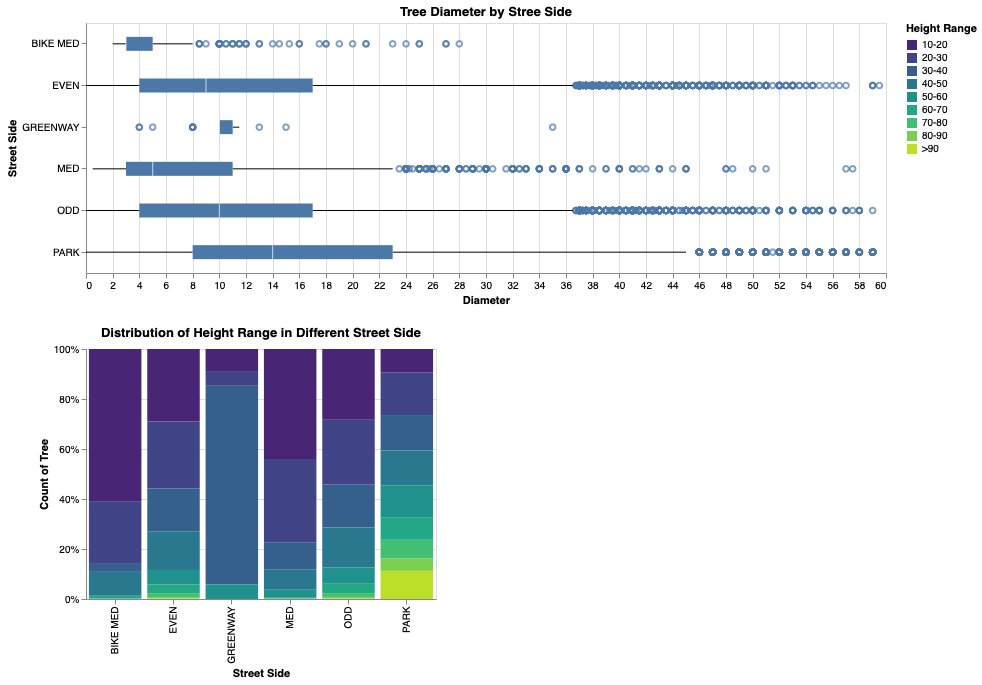

In [17]:
diameter_50 = top_20_tree_species[
    (top_20_tree_species["DIAMETER"] < 60) &
    (top_20_tree_species["DIAMETER"].notna())
]
diameter_boxplot = alt.Chart(diameter_50).mark_boxplot().encode(
    alt.Y('STREET_SIDE_NAME:N', title = 'Street Side'),
    alt.X('DIAMETER:Q', title = "Diameter"),
).properties(
    title='Tree Diameter by Stree Side',
    height= 250,
    width = 800
)

height_bar = alt.Chart(diameter_50).mark_bar().encode(
    alt.X("STREET_SIDE_NAME:N", title = 'Street Side'),
    alt.Y("count():Q", stack='normalize', title = "Count of Tree"),
    alt.Color("HEIGHT_RANGE", scale=alt.Scale(scheme='viridis'), title = "Height Range"),
    alt.Tooltip(["HEIGHT_RANGE", "count()"])
).properties(
        title = "Distribution of Height Range in Different Street Side",
        height = 250,
        width = 350
    )

street_side_fig = diameter_boxplot & height_bar
street_side_fig

In [18]:
street_side_fig.save("../../images/Bri_eda1/street_side_fig.png")

## Preliminary Sketches

How do height and diameter vary across different tree species in Vancouver’s public spaces?
- Stacked bars illustrate the distribution of height, while the line overlay depicts trends in diameter. This method effectively combines two important aspects: the range of heights and the trends in diameter. It utilizes both the position (with bar height representing count) and line encoding (to show diameter trends) effectively. This combination allows for easy comparison of height categories and average diameters within a single plot.
![Sketch 1](../../images/Bri_sketches/sketch_1.jpg)

How does the spatial distribution of the physical traits of species differ across Vancouver?
- A scatterplot displays individual trees at their exact geographic coordinates, preserving spatial accuracy. This method avoids the distortions associated with choropleth maps, which aggregate data into arbitrary regions. In the scatterplot, ordinal height categories (small, medium, and large) are represented using distinct shapes, which helps to eliminate biases related to color hierarchy.
![Sketch 2](../../images/Bri_sketches/sketch_2.jpg)

How do height and diameter of tree influence their placement in different urban settings (e.g., streets, parks, medians, and greenways)?
- Boxplot divide data into five columns and create 15 small plots, which can overwhelm viewers and make comparisons between settings and heights challenging. Grouped bar charts with line overlays may lead to misleading conclusions due to the apparent trends shown by the lines. In contrast, a heatmap is more effective because it directly connects height, diameter, and placement in a single, intuitive view. This makes it particularly useful for high-level comparisons.
![Sketch 1](../../images/Bri_sketches/sketch_#3.jpg)

## Next Step

- Compare height and diameter distribution between North and South Vancouver to identity regional to see how environment and urbanization impact growth
- Compare how trees grow in parks vs. along streets
- Look at species known to withstand drought, heavy rain, or storms and analyze their distribution across Vancouver
- Highlight trees best suited for Vancouver’s long-term urban sustainability.